In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

In [2]:
pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 29.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
def calcular_curva_de_luz(pasta_imagens):
    imagens = sorted(glob.glob(f"{pasta_imagens}/*.jpg"))  # Lista todas as imagens na pasta
    curva_de_luz = []

    for img_path in imagens:
        imagem = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Carregar imagem em escala de cinza
        imagem = imagem - np.median(imagem)  # Remove background médio
        imagem = np.clip(imagem, 0, np.max(imagem))  # Evita valores negativos
        
        intensidade_total = np.sum(imagem)  # Soma da intensidade dos pixels
        curva_de_luz.append(intensidade_total)

    return curva_de_luz

In [3]:
import datetime

def extrair_horarios(imagens):
    horarios = []
    for img_path in imagens:
        nome_arquivo = img_path.split("/")[-1]  # Obtém apenas o nome do arquivo
        timestamp_str = nome_arquivo.split("_")[1]  # Pega a parte "223000" do nome
        hora = timestamp_str[:2]  # "22"
        minuto = timestamp_str[2:4]  # "30"
        horario_formatado = f"{hora}:{minuto}"  # "22:30"
        horarios.append(horario_formatado)
    return horarios


In [8]:
curva_dia1 = calcular_curva_de_luz("/Users/beatrizduque/Downloads/Mestrado/sun-2024-07-23") #com CME
curva_dia2 = calcular_curva_de_luz("/Users/beatrizduque/Downloads/Mestrado/sun-2024-07-20") #sem CME

# curva_dia1 = calcular_curva_de_luz("/Users/beatrizduque/Downloads/Mestrado/sun-2024-10-24") #com CME
# curva_dia2 = calcular_curva_de_luz("/Users/beatrizduque/Downloads/Mestrado/sun-2024-10-22") #sem CME

tempo = np.arange(len(curva_dia1))  # Criamos um eixo de tempo baseado no índice das imagens


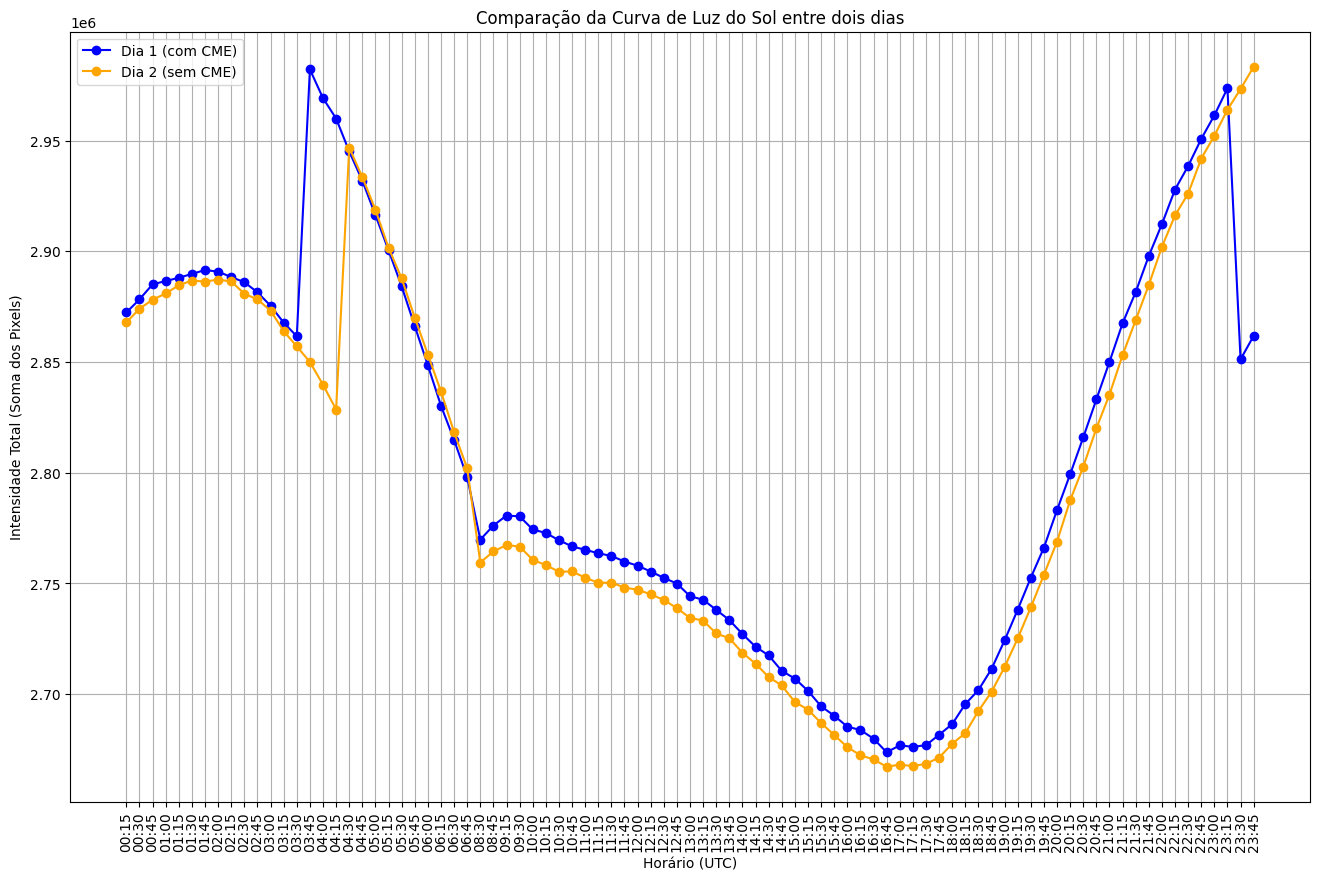

In [9]:
imagens_dia1 = sorted(glob.glob("/Users/beatrizduque/Downloads/Mestrado/sun-2024-07-23/*.jpg"))
imagens_dia2 = sorted(glob.glob("/Users/beatrizduque/Downloads/Mestrado/sun-2024-07-20/*.jpg"))


# imagens_dia1 = sorted(glob.glob("/Users/beatrizduque/Downloads/Mestrado/sun-2024-10-24/*.jpg"))
# imagens_dia2 = sorted(glob.glob("/Users/beatrizduque/Downloads/Mestrado/sun-2024-10-22/*.jpg"))

horarios = extrair_horarios(imagens_dia1)  # Extraindo os horários

plt.figure(figsize=(16, 10))  # Aumenta a largura para distribuir melhor os pontos


plt.plot(horarios, curva_dia1, marker="o", linestyle="-", color="blue", label="Dia 1 (com CME)")
plt.plot(horarios, curva_dia2, marker="o", linestyle="-", color="orange", label="Dia 2 (sem CME)")

plt.xlabel("Horário (UTC)")
plt.ylabel("Intensidade Total (Soma dos Pixels)")
plt.title("Comparação da Curva de Luz do Sol entre dois dias")
plt.legend()
plt.xticks(rotation=90)  # Rotaciona os rótulos para 90 graus
plt.grid(True)
plt.show()

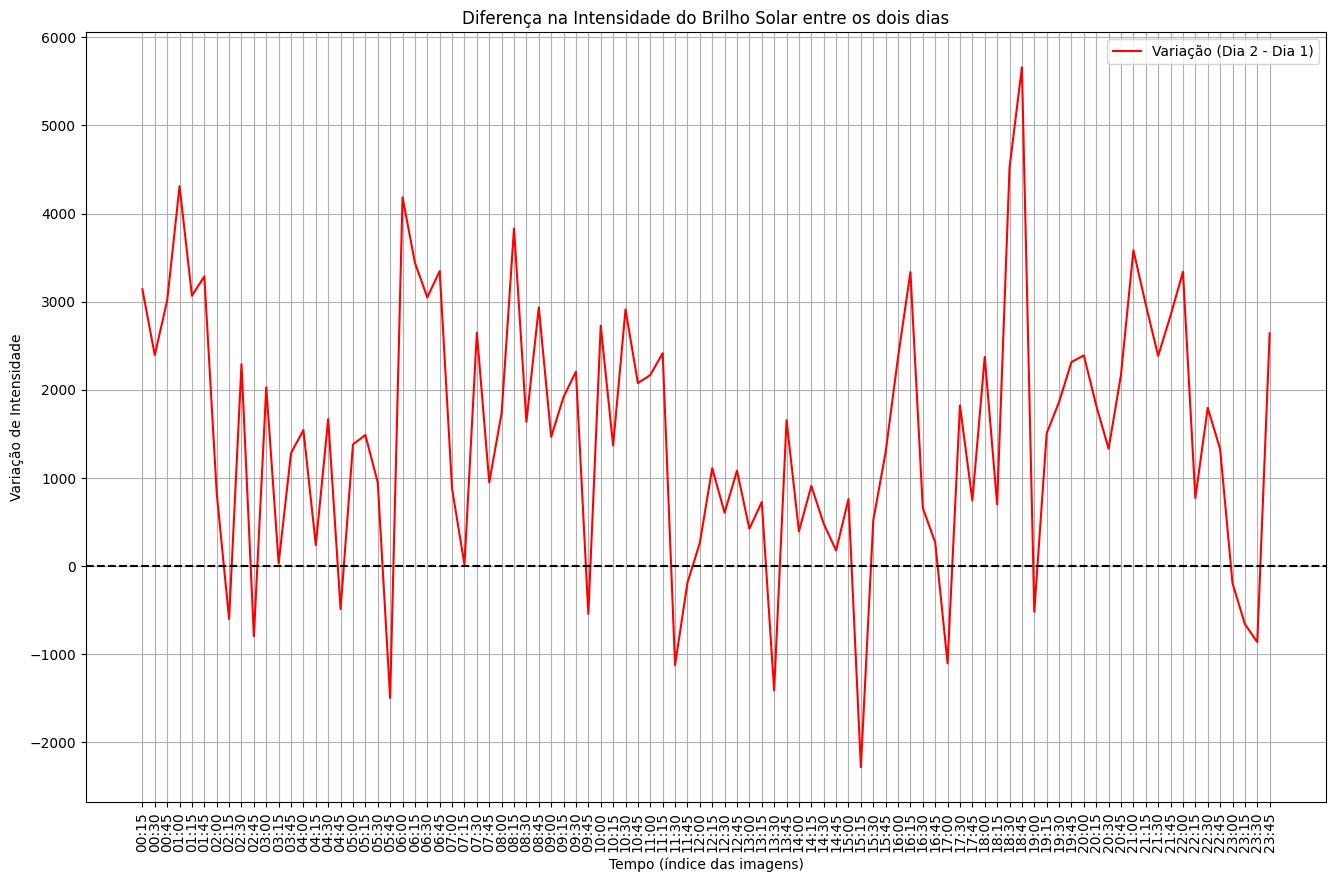

In [44]:
variacao = np.array(curva_dia2) - np.array(curva_dia1)  # Diferença de brilho entre os dias

plt.figure(figsize=(16, 10))
plt.plot(horarios, variacao, marker="", linestyle="-", color="red", label="Variação (Dia 2 - Dia 1)")

plt.xlabel("Tempo (índice das imagens)")
plt.ylabel("Variação de Intensidade")
plt.title("Diferença na Intensidade do Brilho Solar entre os dois dias")
plt.axhline(0, color="black", linestyle="--")  # Linha de referência no zero
plt.xticks(rotation=90)  # Rotaciona os rótulos para 90 graus
plt.legend()
plt.grid(True)
plt.show()
